In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import/read dataset:

In [2]:
data1=pd.read_csv(r"C:\Users\81684\Documents\Python\Airbnb_Open_Data.csv")
data1.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
data1.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# DATA CLEANING :

# Null Values:

In [5]:
data1.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

# Remove Duplicate Values:

In [6]:
data1=data1.drop_duplicates()

# Remove Columns:

In [7]:
data1.drop(['country','license','house_rules','country code'],axis=1,inplace=True)

# Data Types:

In [8]:
data1.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

In [9]:
data1['last review']=pd.to_datetime(data1['last review'],format='mixed')
# change data type of last review, object to datetime, if the date format is mixed, then we use format parameter.

In [10]:
data1['neighbourhood group']=data1['neighbourhood group'].str.replace('brookln','Brooklyn')

In [11]:
data1['price']=data1['price'].str.replace('$','')

In [12]:
data1['price']=data1['price'].str.replace(',','')

In [13]:
data1['service fee']=data1['service fee'].str.replace('$','')

In [14]:
data1['service fee']=data1['service fee'].str.replace('$','')

# Drop Null Values:

In [15]:
data=data1.dropna(subset=['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'])

# Clean Data:

In [16]:
data=data.reset_index(drop=True)


In [17]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
3,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,...,2009.0,1060,212,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83842,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,False,...,2018.0,822,164,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0
83843,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,True,...,2015.0,455,91,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0
83844,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,True,...,2020.0,1078,216,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0
83845,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,False,...,2007.0,103,21,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0


In [18]:
data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.384700e+04,8.384700e+04,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847,83847.000000,83847.000000,83847.000000,83847.000000
mean,2.963226e+07,4.918579e+10,40.727360,-73.948520,2012.486958,7.416843,32.258292,2019-06-11 03:20:55.214855680,1.376643,3.279449,7.033633,141.794531
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.546801e+07,2.445331e+10,40.687660,-73.982120,2007.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,3.085978e+07,4.902603e+10,40.721350,-73.953720,2012.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,4.335474e+07,7.384634e+10,40.762615,-73.930830,2017.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.622044e+07,2.853000e+10,0.056336,0.050332,5.761421,28.047214,51.908815,NaN,1.749147,1.283303,29.516813,133.906528


# DATA ANALYSIS :

# What types to rooms are available in the neighbourhood ?

In [19]:
data['room type'].value_counts(ascending=False)

room type
Entire home/apt    44401
Private room       37672
Shared room         1663
Hotel room           111
Name: count, dtype: int64

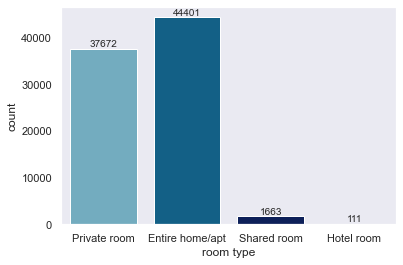

In [20]:
sns.set_theme(style="dark")
count = sns.countplot(x='room type',data=data, palette='ocean_r')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

 # What localities are rated highly by guests ?

In [21]:
data3= data[data['review rate number']>=4]

In [22]:
d=data3.filter(items=['neighbourhood group','neighbourhood','review rate number'])

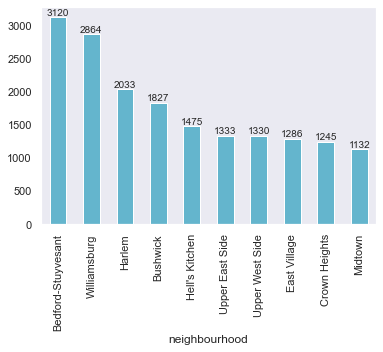

In [23]:
count = d['neighbourhood'].value_counts(ascending=False)[:10].plot(kind='bar',color='c')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

                            
#  Average high availability in different neighbourhood groups

In [24]:
var = data.filter(items=['availability 365','neighbourhood group']).groupby('neighbourhood group').mean().sort_values(by='availability 365',ascending=False)
var

,availability 365
neighbourhood group,
Staten Island,201.138518
Bronx,183.065703
Queens,166.357609
Manhattan,139.113774
Brooklyn,132.472789


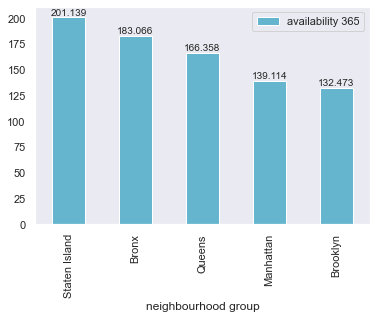

In [25]:
count = var.plot(kind='bar',color='c')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

 # neighbourhood group with varified host identity

In [26]:
varified=data[data['host_identity_verified'].str.contains('verified')]
place=varified['neighbourhood group'].value_counts()
place

neighbourhood group
Manhattan        17417
Brooklyn         17352
Queens            5594
Bronx             1118
Staten Island      401
Name: count, dtype: int64

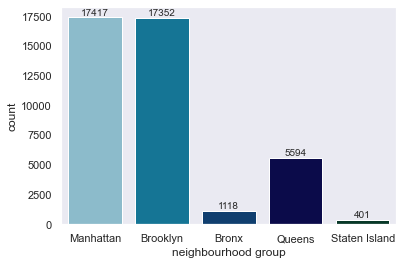

In [27]:
count = sns.countplot(x='neighbourhood group',data=varified,palette='ocean_r')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# Total count of neighbourhood group

In [28]:
var=data['neighbourhood group'].value_counts(ascending=False)
var

neighbourhood group
Brooklyn         34802
Manhattan        34762
Queens           11177
Bronx             2283
Staten Island      823
Name: count, dtype: int64

# Host identity varification status

In [29]:
host_indentity=data['host_identity_verified'].value_counts(ascending=False)
host_indentity

host_identity_verified
unconfirmed    41965
verified       41882
Name: count, dtype: int64

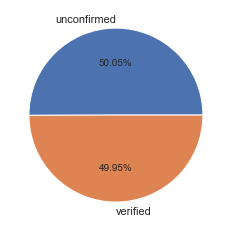

In [30]:
plt.pie(host_indentity,labels=host_indentity.index,autopct='%1.2f%%')
plt.show()

# instant_bookable

In [31]:
var=data['instant_bookable'].value_counts(ascending=False)

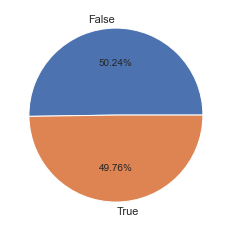

In [32]:
plt.pie(var,labels=var.index,autopct='%1.2f%%')
plt.show()

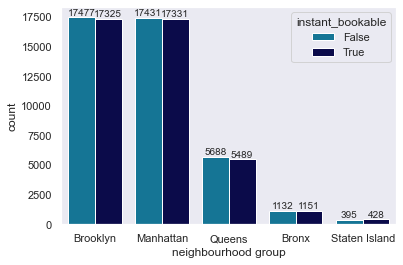

In [33]:
count = sns.countplot(x="neighbourhood group",hue="instant_bookable",data=data,palette='ocean_r')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# which type of rooms are choosen by customers in different neighbourhood groups ?

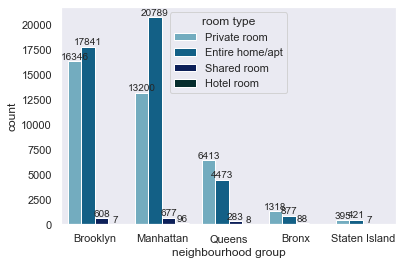

In [34]:
count = sns.countplot(x="neighbourhood group",hue="room type",data=data,palette='ocean_r')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# what kind of cancellation policies are there ?

In [35]:
cancellation_policy=data['cancellation_policy'].value_counts(ascending=False)
cancellation_policy

cancellation_policy
moderate    28100
strict      27913
flexible    27834
Name: count, dtype: int64

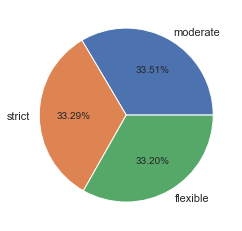

In [36]:
plt.pie(cancellation_policy,labels=cancellation_policy.index,autopct='%1.2f%%')
plt.show()

# How many places are constructed in 2006-2022 ?

In [37]:
var=data['Construction year'].value_counts(ascending=False)
var

Construction year
2006.0    4317
2008.0    4299
2014.0    4279
2019.0    4276
2015.0    4237
2010.0    4215
2005.0    4201
2017.0    4192
2009.0    4185
2003.0    4185
2012.0    4181
2011.0    4181
2020.0    4175
2018.0    4171
2007.0    4167
2022.0    4151
2021.0    4140
2016.0    4137
2004.0    4118
2013.0    4040
Name: count, dtype: int64

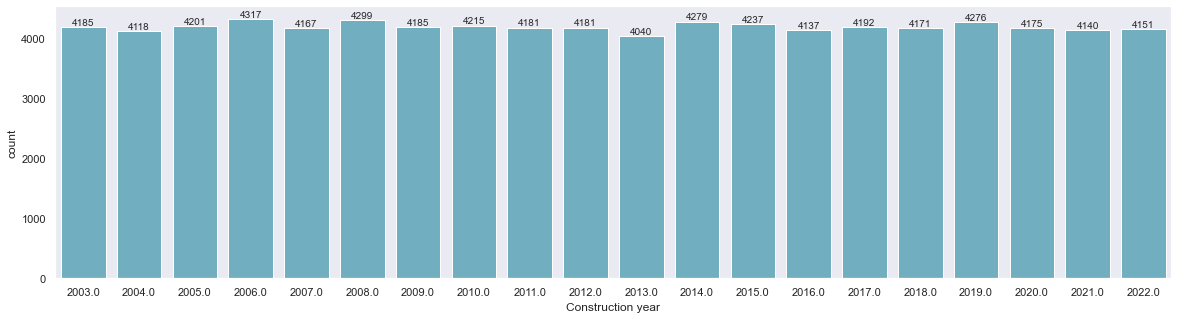

In [38]:
plt.figure(figsize=(20,5))
count = sns.countplot(x='Construction year',data=data,color='c')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# neighbourhood groups with highest number of review

In [39]:
review=data[data['number of reviews']>=250]
highest_review=review.filter(items=['number of reviews','neighbourhood group']).groupby('neighbourhood group').sum().sort_values(by='number of reviews',ascending=False)
highest_review

,number of reviews
neighbourhood group,
Manhattan,93411.0
Brooklyn,83679.0
Queens,71236.0
Bronx,5476.0
Staten Island,949.0


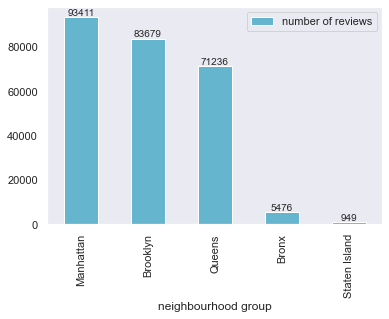

In [40]:
count = highest_review.plot(kind='bar',color='c')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# Top 10 places with highest reviews:

In [41]:
var=data[data['number of reviews']>=500].sort_values(by='number of reviews',ascending=False)
place=var.filter(items=['NAME','number of reviews'])[:10].set_index('NAME')
place

,number of reviews
NAME,
Sonder Battery Park | Studio Apartment,1024.0
City King,1010.0
Amazing Micro Unit W/ communal rooftop and kitchen,966.0
Enjoy great views of the City!,884.0
Come catch a Broadway Show & stay in Times Square,849.0
Hudson River View King Bed at Higher Floor,797.0
Beautiful Standard Full Room at The Ridge,776.0
King Room City,738.0
THE PRIVACY DEN ~ 5 MINUTES TO JFK,698.0


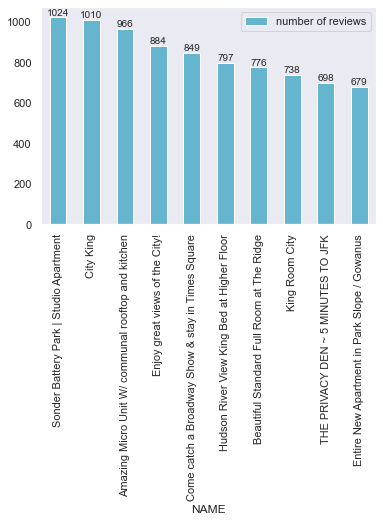

In [42]:
count = place.plot(kind='bar',color='c')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

# Average price wrt to neighbourhood groups ?

In [43]:
data['price']=data['price'].astype(int)
data['service fee']=data['service fee'].astype(int)

In [44]:
price=data.filter(items=['price','neighbourhood group']).groupby('neighbourhood group').mean().sort_values(by='price',ascending=False)
price

,price
neighbourhood group,
Queens,630.577436
Bronx,630.267630
Brooklyn,627.188409
Manhattan,623.395432
Staten Island,621.641555


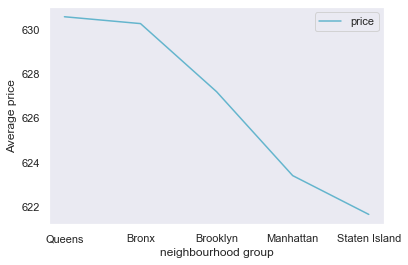

In [45]:
price.plot(kind='line',color='c')
plt.ylabel('Average price')
plt.show()

In [47]:
data.dtypes

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                      int32
service fee                                int32
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host list

# Conclusion :

* most of the people prefer entire home/apt. room in brooklyn and manhattan.
* The availability is highest in staten island. 
* 49.95% of hosts are varified. 49.76% of the air bnbs are instantly bookable.
* In 2006 the construction was highest. Number of reviews are high in manhattan and brooklyn respectively.
* The number of air bnbs are high in brooklyn and manhattan.
* The Average pricing in brooklyn and manhattan is less then most of the other neighbourhood groups.
